In [2]:
import os
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

from skimage.filters import threshold_mean
from skimage.morphology import binary_closing, binary_opening
from skimage.measure import label
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

In [95]:
class Image:
    
    def __init__(self, path, channel_names=None):
        self.path = path
        self.channel_names = channel_names
        
    def load_image(self):
        img = io.imread(self.path)
        img = np.swapaxes(img, 0, 2)
        img = np.swapaxes(img, 0, 1)
        self.image = img
        
    def display_image(self):
        channels = self.image.shape[-1]
        for i in range(channels):
            plt.subplot(1, channels, i+1)
            plt.imshow(self.image[:,:,i], cmap="gray") 
            if self.channel_names != None:
                plt.title(self.channel_names[i])
            plt.axis("off")
            
    def remove_background(self):
        pass
    
class XpressImage(Image):
    
    def __init__(self, path, name):
        if path.endswith('/')==False:
            path=path+'/'
        self.path = path
        self.imfiles=[]
        self.channel_names=[]
        for file in os.listdir(path):
            if file.startswith(name):
                self.imfiles.append(file)
                self.channel_names.append(file[len(name)+1:len(name)+3])
                

    def load_image(self):
        ims=[]
        for file in self.imfiles:
            ims.append(io.imread(self.path+file))
        self.image=np.stack(ims, axis=2)
            
class Detector:
    
    def __init__(self, cell_channel=None, nucleus_channel=None):
        self.cell_channel = cell_channel
        self.nucleus_channel = nucleus_channel
        
        
    def watershed(self, binary):
        pass
    
    def make_binary(self, image):
        pass
        
    def detect_cells(self, image):
        
        image_data = image[:,:,self.cell_channel]
        thr = threshold_mean(image_data)
        binary = image_data > thr
        binary = binary_closing(binary, np.ones(shape=(8,8)))
        binary = binary_opening(binary, np.ones(shape=(15,15)))
        distance = ndi.distance_transform_edt(binary)
        coords = peak_local_max(distance, footprint=np.ones((150, 150)), labels=binary)
        mask = np.zeros(distance.shape, dtype=bool)
        mask[tuple(coords.T)] = True
        markers, _ = ndi.label(mask)
        labels = watershed(-distance, markers, mask=binary)
        
        return labels
    
    def detect_nuclei(self, image):
        pass
    
    def detect_cell_borders(self, image):
        pass            
            
class Experiment:
    
    def __init__(self, path):
        self.path = path
        self.images = []
        
    def get_images(self):
        pass
    
    def analyse(self):
        pass   
    

In [24]:
import os

path="/home/balint/ora/cellImageAnalysis/data/ 2022.01.15/"
fajlok=os.listdir(path)
fajlok.sort()
os.path.isfile(path+fajlok[0])

True

In [25]:
img=io.imread(path+fajlok[0])

In [26]:
img.shape

(2048, 2048)

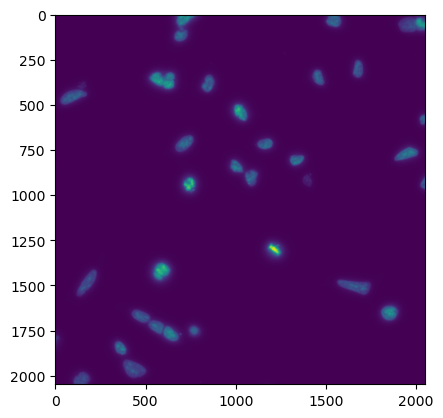

In [27]:
plt.imshow(img)

In [30]:
fajlok

['20230309 endogenHTSF1 tobb mRFP_A04_s45_w10CEDFE1E-AE00-4753-B664-27A1B96C92EF.tif',
 '20230309 endogenHTSF1 tobb mRFP_A04_s47_w2D9548333-5D2C-4A9F-BFC8-07396AC082C3.tif',
 '20230309 endogenHTSF1 tobb mRFP_A04_s47_w139FF035A-48AC-48F9-B54E-54A2F6777F62.tif',
 '20230309 endogenHTSF1 tobb mRFP_A04_s45_w291E8B142-3958-4B03-AFC4-E5CE3708F0B5.tif',
 '20230309 endogenHTSF1 tobb mRFP_A04_s45_w3F87FB244-C8AC-4081-966E-87B86FF5FEAE.tif',
 '20230309 endogenHTSF1 tobb mRFP_A04_s47_w3F0FE5F65-AF6C-4985-8EEE-BAD21224E860.tif']

In [59]:
name='20230309 endogenHTSF1 tobb mRFP_A04_s45'
imfiles=[]
for fajl in os.listdir(path):
    if fajl.startswith(name):
        imfiles.append(fajl)
        #print(fajl)
        #print(fajl[len(name):len(name)+3])
imfiles.sort()
print(imfiles)

['20230309 endogenHTSF1 tobb mRFP_A04_s45_w10CEDFE1E-AE00-4753-B664-27A1B96C92EF.tif', '20230309 endogenHTSF1 tobb mRFP_A04_s45_w291E8B142-3958-4B03-AFC4-E5CE3708F0B5.tif', '20230309 endogenHTSF1 tobb mRFP_A04_s45_w3F87FB244-C8AC-4081-966E-87B86FF5FEAE.tif']


In [54]:
img0=io.imread(path+imfiles[0])
#img0.reshape(2048, 2048, 1)
img1=io.imread(path+imfiles[1])
#img1.reshape(2048, 2048, 1)
img2=io.imread(path+imfiles[2])
img=np.stack([img0, img1, img2], axis=2)

In [47]:
img0=io.imread(path+imfiles[0])
img0.reshape(2048, 2048, 1)
img0.shape

(2048, 2048)

In [55]:
img.shape

(2048, 2048, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


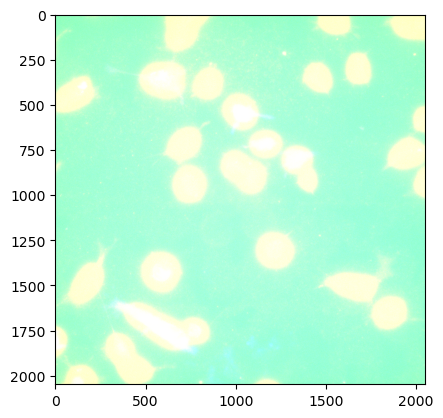

In [58]:
plt.imshow(img)

In [66]:
for i, file in enumerate(imfiles):
            im0=io.imread(path+file)
            if i==0:
                img=im0
            else:
                img=np.stack([img, im0], axis=2)

ValueError: all input arrays must have the same shape

In [67]:
img.shape

(2048, 2048, 2)

In [86]:
ims=[]
for i, file in enumerate(imfiles):

    ims.append(io.imread(path+file))
img=np.stack(ims, axis=2)  

In [87]:
img.shape

(2048, 2048, 3)

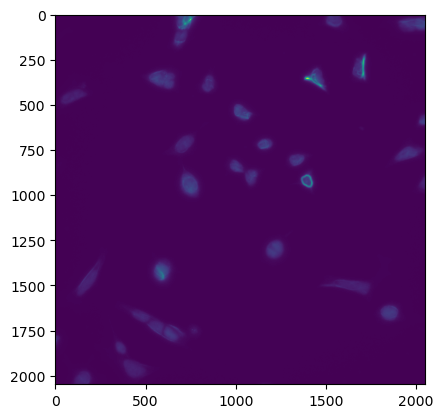

In [90]:
plt.imshow(img[:,:,1])

In [96]:
img=XpressImage(path, name='20230309 endogenHTSF1 tobb mRFP_A04_s45')

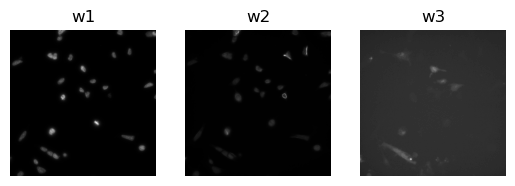

In [97]:
img.load_image()
img.display_image()

In [84]:
img.channel_names

['w3', 'w3', 'w3']

In [94]:
img.imfiles

['20230309 endogenHTSF1 tobb mRFP_A04_s45_w10CEDFE1E-AE00-4753-B664-27A1B96C92EF.tif',
 '20230309 endogenHTSF1 tobb mRFP_A04_s45_w291E8B142-3958-4B03-AFC4-E5CE3708F0B5.tif',
 '20230309 endogenHTSF1 tobb mRFP_A04_s45_w3F87FB244-C8AC-4081-966E-87B86FF5FEAE.tif']